# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Loading the Data

In [1]:
# Load pickled data
import pickle
import numpy as np

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


### Summary of the Data Set

In [2]:

# training examples
n_train = len(X_train)

# validation examples
n_validation = len(X_validation)

# testing examples.
n_test = len(X_test)

# shape of a traffic sign image
image_shape = X_train[0].shape

# unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Dataset Visualization

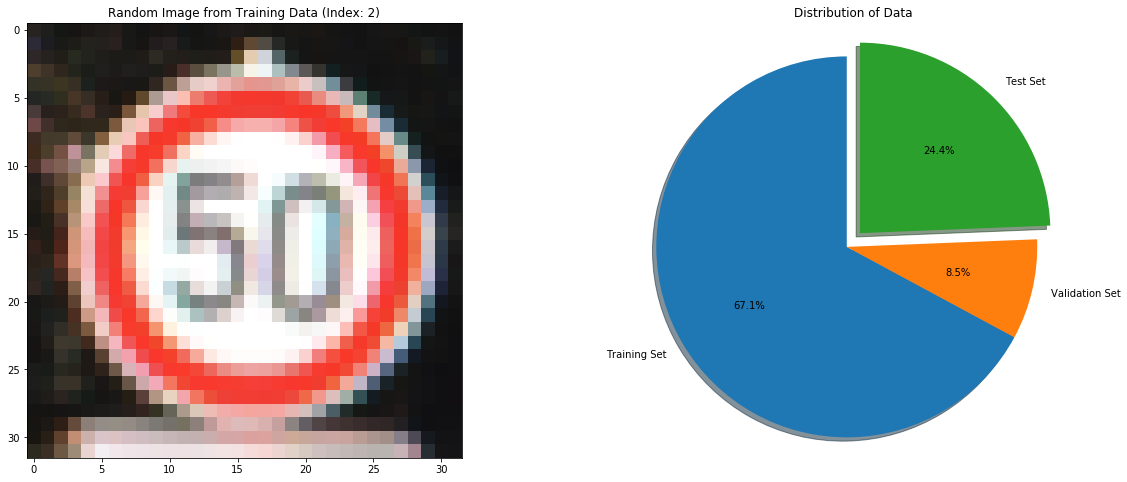

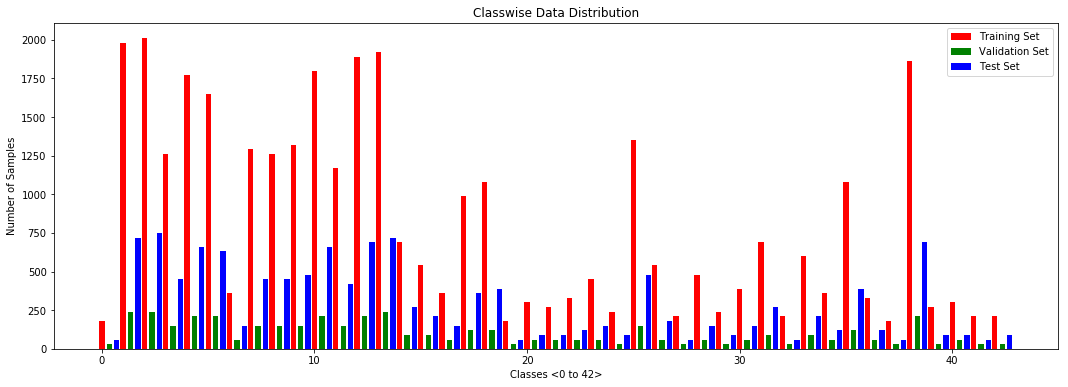

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
plt.imshow(image)
plt.title('Random Image from Training Data (Index: {})'.format(y_train[index]))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Training Set', 'Validation Set', 'Test Set'
sizes = [n_train, n_validation, n_test]
explode = (0, 0, 0.1)

ax2 = fig.add_subplot(122)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Data')

train_data_stats = np.unique(y_train, return_counts = True)
valid_data_stats = np.unique(y_validation, return_counts = True)
test_data_stats = np.unique(y_test, return_counts = True)
width_bar = 0.25
width_gap = 0.35
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111)
train_data_plot = ax1.bar(train_data_stats[0], train_data_stats[1], width_bar, color='r')
valid_data_plot = ax1.bar(valid_data_stats[0] + width_gap, valid_data_stats[1], width_bar, color='g')
test_data_plot = ax1.bar(test_data_stats[0] + 2*width_gap, test_data_stats[1], width_bar, color='b')

ax1.legend((train_data_plot,valid_data_plot,test_data_plot), ('Training Set', 'Validation Set', 'Test Set'))
ax1.set_title('Classwise Data Distribution')
ax1.set_ylabel('Number of Samples')
ax1.set_xlabel('Classes <0 to 42>')
plt.show()

### Data Preprocessing

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Rotating and appending training data
#X_train = np.append(X_train, np.rot90(X_train,axes=(1,2)),axis=0)
#y_train = np.append(y_train,y_train, axis=0)

#RGB to Grayscale
#X_train = np.sum(X_train/3, axis=3, keepdims = True)
#X_validation = np.sum(X_validation/3, axis=3, keepdims = True)
#X_test = np.sum(X_test/3, axis=3, keepdims = True)

# image = X_train[index].squeeze()
# fig = plt.figure(figsize=(20,8))
# ax1 = fig.add_subplot(121)
# plt.imshow(image)
# plt.title('Before Normalization (Index: {})'.format(y_train[index]))


# Normalization and zeroeing the mean
X_train = (np.float32(X_train) - 128.0)/128.0
X_train = X_train - np.mean(X_train)
print(np.mean(X_train))
X_validation = (np.float32(X_validation) - 128.0)/128.0
X_validation = X_validation - np.mean(X_validation)
print(np.mean(X_validation))
X_test = (np.float32(X_test) - 128.0)/128.0
X_test = X_test - np.mean(X_test)
print(np.mean(X_test))

# image = X_train[index].squeeze()
# fig = plt.figure(figsize=(10,4))
# ax1 = fig.add_subplot(122)
# plt.imshow(image)
# plt.title('After Normalization (Index: {})'.format(y_train[index]))

-1.73741e-06
1.06117e-07
1.55113e-06


## Model Architecture

In [ ]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 16

from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    strides_conv1 = [1, 1, 1, 1]
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    w_conv1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mu, sigma))
    b_conv1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,w_conv1, strides_conv1, padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b_conv1)

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_ksize1 = [1, 2, 2,1] 
    pool_strides1 = [1, 2, 2, 1]
    conv1 = tf.nn.max_pool(conv1, pool_ksize1, pool_strides1, padding = 'VALID')
    
    # Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Layer 2: Convolutional. Output = 10x10x16.
    strides_conv2 = [1, 1, 1, 1]
    w_conv2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16],mu,sigma))
    b_conv2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, w_conv2, strides_conv2, padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, b_conv2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_ksize2 = [1, 2, 2, 1] 
    pool_strides2 = [1, 2, 2, 1]
    conv2 = tf.nn.max_pool(conv2, pool_ksize2, pool_strides2, padding = 'VALID')
    
    # Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Flatten. Input = 5x5x16. Output = 400.
    conv2 =tf.reshape(conv2, [-1, 400])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    f1_weights = tf.Variable(tf.truncated_normal([400,120],mu,sigma))
    f1_biases = tf.Variable(tf.zeros(120))
    f1 = tf.add(tf.matmul(conv2, f1_weights), f1_biases)
    # Activation.
    f1 = tf.nn.relu(f1)
    
    # Dropout
    #f1 = tf.nn.dropout(f1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    f2_weights = tf.Variable(tf.truncated_normal([120, 84],mu,sigma))
    f2_biases = tf.Variable(tf.zeros(84))
    f2 = tf.add(tf.matmul(f1, f2_weights),f2_biases)
    
    # Activation.
    f2 = tf.nn.relu(f2)
    
    # Dropout
    #f2 = tf.nn.dropout(f2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    f3_weights = tf.Variable(tf.truncated_normal([84, 43], mu, sigma))
    f3_biases = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(f2, f3_weights), f3_biases)
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


rate = tf.placeholder(tf.float32)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Training, Validation and Testing the Model

In [ ]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy = 0
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75, rate: 0.001*np.exp(-0.1*i)})
            
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        print_rate = 0.001*np.exp(-0.1*i)
        print("Rate: {0:0.6f}".format(print_rate))
        
        
    saver.save(sess, './lenet')
    print("Model saved")

---

## Testing the Model on New Images


### Testing on pre-segregated Test Data Set

In [ ]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Loading 5 new images from web

In [ ]:

import cv2
from scipy import misc
import matplotlib.image as mpimg 
image = np.zeros([5,32,32,3], dtype = 'uint8')

image[0] = misc.imresize(cv2.imread('./test_images_web/road_work.jpg'),(32,32,3))[...,::-1]
image[1] = misc.imresize(cv2.imread('./test_images_web/slippery_road.jpg'),(32,32,3))[...,::-1]
image[2] = misc.imresize(cv2.imread('./test_images_web/speed_limit_120.jpg'),(32,32,3))[...,::-1]
image[3] = misc.imresize(cv2.imread('./test_images_web/stop.png'),(32,32,3))[...,::-1]
image[4] = misc.imresize(cv2.imread('./test_images_web/yield.png'),(32,32,3))[...,::-1]

image = (np.float32(image) - 128.0)/128.0
image = image - np.mean(image)


webtest_input = image
webtest_label = [25,23,8,14,13]
plt.figure

for i in range(0,5):
    plt.subplot(3,2,i+1)
    plt.imshow(image[i])

### Analyzing Performance on 5 web images

In [ ]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(webtest_input, webtest_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Output of Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:

softmax_probabilities = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_prob = sess.run(softmax_probabilities, feed_dict={x: webtest_input, keep_prob: 1})
    print(sess.run(tf.nn.top_k(tf.constant(softmax_prob), k=5)))

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")